# Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use the same dataset of the SVM notebook: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place your ID ("numero di matricola") that will be used as seed for random generator. You can try to change the seed to see the impact of the randomization.

In [3]:
ID = 1205462
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
# rescale the data
X = X / 255.0

Now split into training and test. Make sure that each label is present at least 10 times
in training frequencies.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [50 49 44 46 57 54 49 45 56 50]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


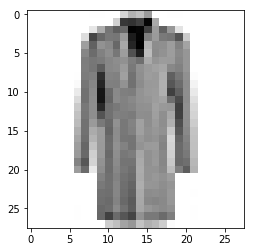

LABEL: 4
INPUT:


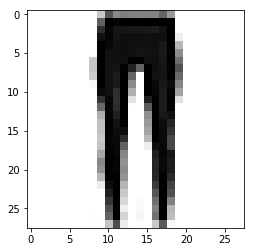

LABEL: 1
INPUT:


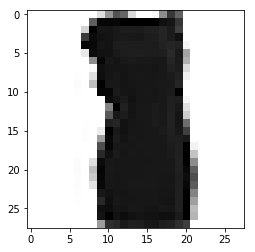

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

## TO DO 1

Now use a Feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. Evaluate the architectures you chose using the GridSearchCV with cv=5.


In [8]:
parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,), (10, 10, 10,), (50, 50, 50,)]}

mlp = MLPClassifier(max_iter=300, alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

#ADD YOUR CODE
clf = GridSearchCV(estimator=mlp, param_grid=parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)
print ('RESULTS FOR NN\n')

print("Best parameters set found:", clf.best_params_)
#ADD YOUR CODE

print("Score with best parameters:", clf.best_score_)
#ADD YOUR CODE

print("\nAll scores on the grid:")
#ADD YOUR CODE
results = pd.DataFrame(clf.cv_results_)
results[["params", "mean_test_score"]]

/mnt/d/WindowsSubSystemForLinux/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR NN

Best parameters set found: {'hidden_layer_sizes': (50,)}
Score with best parameters: 0.744

All scores on the grid:


,params,mean_test_score
0,"{'hidden_layer_sizes': (10,)}",0.722
1,"{'hidden_layer_sizes': (50,)}",0.744
2,"{'hidden_layer_sizes': (10, 10)}",0.502
3,"{'hidden_layer_sizes': (50, 50)}",0.678
4,"{'hidden_layer_sizes': (10, 10, 10)}",0.260
5,"{'hidden_layer_sizes': (50, 50, 50)}",0.606


### QUESTION 1

**What do you observe for different architectures and their scores? How the nummber of layers and their sizes affect the performances?**

In my test, the best score is obtained for a network with only one hidden layer, with size equal to 50. Performances seems to downgrade if I add more hidden layers; in addition, the size of the layers appears to be not so important when the number of layers is very small, but it starts to depend heavily on the size when the numbets of layers increase. In this last case, NN with layers with small size perform worser than the others.

### TO DO 2

Now get training and test error for a NN with best parameters from above. Use verbose=True
in input so to see how loss changes in iterations

In [9]:
#get training and test error for the best NN model from CV

#ADD YOUR CODE
best_NN = MLPClassifier(hidden_layer_sizes=(50, ), solver='sgd', alpha=1e-4, learning_rate_init=.1, 
                        max_iter=300,random_state=ID, tol=1e-4, verbose=True)

best_NN.fit(X_train, y_train)

training_error = 1. - best_NN.score(X_train,y_train) #ADD YOUR CODE
test_error = 1. - best_NN.score(X_test,y_test) #ADD YOUR CODE

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 2.39308069
Iteration 2, loss = 1.52733447
Iteration 3, loss = 1.22563619
Iteration 4, loss = 2.00180857
Iteration 5, loss = 0.97492321
Iteration 6, loss = 0.79430823
Iteration 7, loss = 0.71088950
Iteration 8, loss = 0.60497699
Iteration 9, loss = 0.55027378
Iteration 10, loss = 0.48542553
Iteration 11, loss = 0.44623194
Iteration 12, loss = 0.48005167
Iteration 13, loss = 0.42789395
Iteration 14, loss = 0.37619585
Iteration 15, loss = 0.33465815
Iteration 16, loss = 0.32293858
Iteration 17, loss = 0.28974192
Iteration 18, loss = 0.27818810
Iteration 19, loss = 0.34877920
Iteration 20, loss = 0.24623270
Iteration 21, loss = 0.26610449
Iteration 22, loss = 0.23987543
Iteration 23, loss = 0.18849608
Iteration 24, loss = 0.17787357
Iteration 25, loss = 0.17032104
Iteration 26, loss = 0.21240328
Iteration 27, loss = 0.16133658
Iteration 28, loss = 0.16010318
Iteration 29, loss = 0.16402800
Iteration 30, loss = 0.12321557
Iteration 31, loss = 0.13508082
Iteration 32, los

## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before, but you can try more if you want!

In [10]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1012, 1020,  998,  989,  946,  974, 1015, 1017, 1031,  998]))

## TO DO 3

Now train the NNs with the added data points. Feel free to try more different architectures than before if you want, or less if it takes too much time. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [11]:
#for NN we try the same architectures as before
parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,), (10, 10, 10,), (50, 50, 50,), 
                                     (10, 10, 10, 10,), (50, 50, 50, 50,)]}

#ADD YOUR CODE

mlp_large_CV = MLPClassifier(max_iter=300, alpha=1e-4,
                             solver='sgd', tol=1e-4, random_state=ID,
                             learning_rate_init=.1)

clf_large_CV = GridSearchCV(estimator=mlp, param_grid=parameters, cv=5, return_train_score=True)
clf_large_CV.fit(X_train, y_train)

print ('\nRESULTS FOR NN\n')

print("Best parameters set found:")
print(clf_large_CV.best_params_)

print("Score with best parameters:")
print(clf_large_CV.best_score_)

print("\nAll scores on the grid:")
results_large = pd.DataFrame(clf_large_CV.cv_results_)
results_large[["params", "mean_test_score"]]

/mnt/d/WindowsSubSystemForLinux/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50,)}
Score with best parameters:
0.8271

All scores on the grid:


,params,mean_test_score
0,"{'hidden_layer_sizes': (10,)}",0.7225
1,"{'hidden_layer_sizes': (50,)}",0.8271
2,"{'hidden_layer_sizes': (10, 10)}",0.5093
3,"{'hidden_layer_sizes': (50, 50)}",0.7671
4,"{'hidden_layer_sizes': (10, 10, 10)}",0.6276
5,"{'hidden_layer_sizes': (50, 50, 50)}",0.6570
6,"{'hidden_layer_sizes': (10, 10, 10, 10)}",0.4392
7,"{'hidden_layer_sizes': (50, 50, 50, 50)}",0.6702


## QUESTION 2

**Describe your architecture choices and the results you observe with respect to the layers and sizes used.**

The best score is obtained for a NN with a single hidden layer of size 50, as before. In this case, however, incresing the number of layers leads to bigger error, but the downgrade is less important than in the previous analysis. As before, larger NN perfor better if they have bigger layers with respect to the ones with the same size, but with smaller layers.

## TO DO 4

Get the train and test error for the best NN you obtained with 10000 points. This time you can run for 100 iterations. 


In [12]:
#get training and test error for the best NN model from CV

#ADD YOUR CODE

best_NN_large = MLPClassifier(hidden_layer_sizes=(50,), solver='sgd', alpha=1e-4, learning_rate_init=.1, 
                              max_iter=300,random_state=ID, tol=1e-4)

best_NN_large.fit(X_train, y_train)

training_error = 1. - best_NN_large.score(X_train,y_train) #ADD YOUR CODE
test_error     = 1. - best_NN_large.score(X_test,y_test) #ADD YOUR CODE

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR BEST NN

Best NN training error: 0.012800
Best NN test error: 0.160400


## QUESTION 3

**Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?**

In both case the best architecture for the NN was with a single hidden layer of size equal to 50.

In the case with only 500 data points, the training error is equal to 0, while the test error is 0.22. The use of the larger dataset (10000 points) leads to a training error equal to 0.01, and a test error of 0.16.

The larger training set helps to reduce the error on the test set: that implies that the overfitting becomes less important expanding the training sample.

### TO DO 5

Plot a digit that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

Image #17728
NN prediction = 4
Large NN prediction = 2
INPUT:


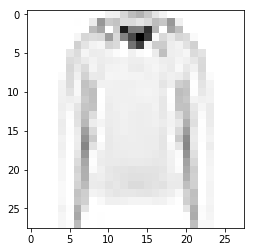

LABEL: 2


In [13]:
NN_prediction = best_NN.predict(X_test)#ADD YOUR CODE
large_NN_prediction = best_NN_large.predict(X_test)#ADD YOUR CODE

wrong_index = []
### ADD CODE TO SEARCH AND VISUALIZE
for i in range(len(y_test)):
    if (large_NN_prediction[i] == y_test[i]) and (NN_prediction[i] != y_test[i]):
        wrong_index.append(i)

# Select a random image
j = wrong_index[np.random.randint(0, len(wrong_index))]
print("Image #"+str(j))
print("NN prediction =",   NN_prediction[j])
print("Large NN prediction =", large_NN_prediction[j])
plot_input(X_test,y_test,j)
        

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large" , you could need to replace with your variable names.



Weights with 500 data points:


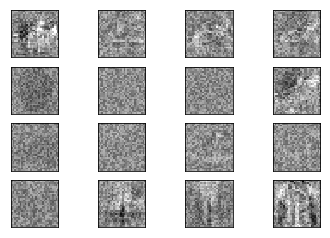

Weights with 10000 data points:


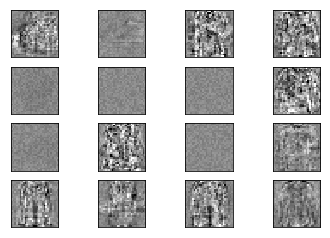

In [14]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_NN.coefs_[0].min(), best_NN.coefs_[0].max()
for coef, ax in zip(best_NN.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_NN_large.coefs_[0].min(), best_NN_large.coefs_[0].max()
for coef, ax in zip(best_NN_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 4

**Describe what do you observe by looking at the weights**

The figures of the weights with 500 data points appear to be more noisy than the ones with 10000 points.

### TO DO 7

Report the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores.

In [16]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# best parameters found in the SVM notebook
# Create the SVM and perform the fit

#ADD YOUR CODE
SVM = SVC(C=100, gamma=0.01, kernel='rbf')
SVM.fit(X_train, y_train)

print ('RESULTS FOR SVM')

SVM_training_error = 1. - SVM.score(X_train,y_train)

print("Training error SVM:")
print(SVM_training_error)

SVM_test_error = 1. - SVM.score(X_test,y_test)
print("Test error SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training error SVM:
0.0
Test error SVM:
0.14500000000000002


## QUESTION 5

**Compare the results of SVM and of NN. Which one would you preferer? Which are its tradeoffs?**

The test error of the SVM is slightly better than the one of the bigger NN (0.14 for SVM, 0.16 for NN). In addition, the SVM algorithm is faster in this task. In this case I would prefer SVM.